# Project: Analyzing the reason for no-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
These are the columns of the dataset:
<ul>
<li>PatientId</li>
<li>AppointmentID</li>
<li>Gender</li>
<li>ScheduledDay</li>
<li>AppointmentDay</li>
<li>Age</li>
<li>Neighbourhood</li>
<li>Scholarship</li>
<li>Hipertension</li>
<li>Diabetes</li>
<li>Alcoholism</li>
<li>Handcap</li>
<li>SMS_received</li>
<li>No-show</li>
</ul>
And there are two question which will be discussed in this project, and these are the questions:
<ul>
<li>What is the percentage of attendance for patients? And the rate for both male and female in (Show) and (No Show)?</li>
<li>What is the average age ratio for patients attendance?</li>
</ul>

In [2]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [3]:
# read the data

df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# ask about the number of rows and columns
df.shape

(110527, 14)

In [5]:
# some statistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# average of Age
df['Age'].mean()

37.088874211731067

In [7]:
# replace any data in Age which is less than or equal 0
# some statistics about the data
df[df['Age'] <= 0] = df['Age'].mean()
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.425642e+14,5.493660e+06,38.276780,1.285691,1.385142,1.259761,1.218296,1.210135,1.500806
std,2.530289e+14,1.001764e+06,22.104561,6.519426,6.506669,6.522499,6.527195,6.528421,6.489885
min,3.708887e+01,3.708887e+01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.251883e+12,5.636216e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.697449e+13,5.678212e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.231455e+13,5.723640e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,37.088874,37.088874,37.088874,37.088874,37.088874,37.088874


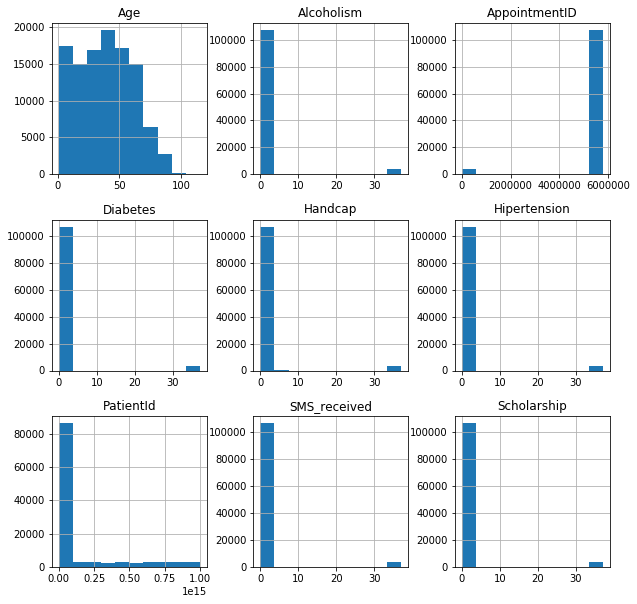

In [8]:
# showing the histogram of dataset
df.hist(figsize=(10, 10));

In [11]:
# check if there is any duplicate rows
sum(df.duplicated())

0

In [10]:
# delete the duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106988 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         106988 non-null float64
AppointmentID     106988 non-null float64
Gender            106988 non-null object
ScheduledDay      106988 non-null object
AppointmentDay    106988 non-null object
Age               106988 non-null float64
Neighbourhood     106988 non-null object
Scholarship       106988 non-null float64
Hipertension      106988 non-null float64
Diabetes          106988 non-null float64
Alcoholism        106988 non-null float64
Handcap           106988 non-null float64
SMS_received      106988 non-null float64
No-show           106988 non-null object
dtypes: float64(9), object(5)
memory usage: 12.2+ MB


In [136]:
# conver (AppointmentDay, ScheduledDay) into datetime
# information about dataset
# showing the first rows
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106988 entries, 0 to 110526
Data columns (total 18 columns):
PatientId         106988 non-null float64
AppointmentID     106988 non-null float64
Gender            106988 non-null object
ScheduledDay      106988 non-null datetime64[ns]
AppointmentDay    106988 non-null datetime64[ns]
Age               106988 non-null float64
Neighbourhood     106988 non-null object
Scholarship       106988 non-null float64
Hipertension      106988 non-null float64
Diabetes          106988 non-null float64
Alcoholism        106988 non-null float64
Handcap           106988 non-null float64
SMS_received      106988 non-null float64
No-show           106988 non-null int64
AppWeekDay        106988 non-null object
SchWeekDay        106988 non-null object
show              106988 non-null bool
notshow           106988 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(9), int64(1), object(4)
memory usage: 14.1+ MB


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppWeekDay,SchWeekDay,show,notshow
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,Friday,Friday,True,False


In [14]:
# conver (AppointmentDay, ScheduledDay) into weekdays
df['AppWeekDay'] = df['AppointmentDay'].dt.weekday_name
df['SchWeekDay'] = df['ScheduledDay'].dt.weekday_name
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106988 entries, 0 to 110526
Data columns (total 16 columns):
PatientId         106988 non-null float64
AppointmentID     106988 non-null float64
Gender            106988 non-null object
ScheduledDay      106988 non-null datetime64[ns]
AppointmentDay    106988 non-null datetime64[ns]
Age               106988 non-null float64
Neighbourhood     106988 non-null object
Scholarship       106988 non-null float64
Hipertension      106988 non-null float64
Diabetes          106988 non-null float64
Alcoholism        106988 non-null float64
Handcap           106988 non-null float64
SMS_received      106988 non-null float64
No-show           106988 non-null object
AppWeekDay        106988 non-null object
SchWeekDay        106988 non-null object
dtypes: datetime64[ns](2), float64(9), object(5)
memory usage: 13.9+ MB


In [17]:
# discover the data inside the No-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# replace the wrong value with more repeated data (No)
df['No-show'].replace([37.08887421173107],'No', inplace = True)

In [21]:
# discover the data inside the Gender column
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [19]:
# number of female and male
FT = sum(df['Gender'] == 'F')
MT = sum(df['Gender'] == 'M')
print(FT)
print(MT)

70118
36869


In [20]:
# replace the wrong value with more repeated data (F)
df['Gender'].replace([37.08887421173107],'F', inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1: What is the percentage of attendance for patients? And the rate for both male and female in (Show) and (No Show)?

Number of No-show =  21680
Number of Show =  85308


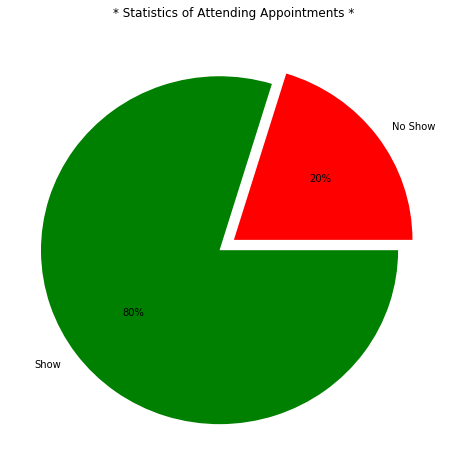

In [135]:
# showing the number of people (No show, show) and display the chart with a ratio
NoShow = sum(df['No-show'] == 1)
Show = sum(df['No-show'] == 0)

print("Number of No-show = ", + NoShow)
print("Number of Show = ", + Show)
plt.title('* Statistics of Attending Appointments *')
plt.pie([NoShow, Show]
        , explode= (0, 0.1)
        , labels= ['No Show', 'Show']
        , colors= ['red', 'green']
        , autopct='%1.f%%')
fig = plt.gcf()
fig.set_size_inches(8,8);

The showed patients [80%] is more than no-showed patients [20%]. 

Number of Male Show =  29464
Number of Female Show =  55844


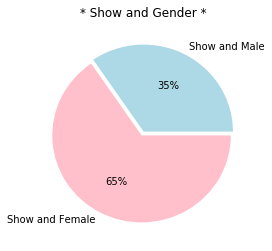

In [131]:
# showing the number of people who showed up and their Gender (Female, Male)
# and display the chart with a ratio.
genM = ['M']
SaM = len(df.loc[(df['No-show'] == 0) & df['Gender'].isin(genM)])
genF = ['F']
SaF = len(df.loc[(df['No-show'] == 0) & df['Gender'].isin(genF)])

print("Number of Male Show = ", + SaM)
print("Number of Female Show = ", + SaF)

plt.title('* Show and Gender *')
plt.pie([SaM, SaF]
        , explode= (0, 0.05)
        , labels= ['Show and Male', 'Show and Female']
        , colors= ['lightblue', 'pink']
        , autopct='%1.f%%')
fig = plt.gcf()
fig.set_size_inches(4,4);

The ratio of Female who showed is 65%

and the ratio of male who showed is 35%

Number of Male No-show =  7405
Number of Female No-show =  14275


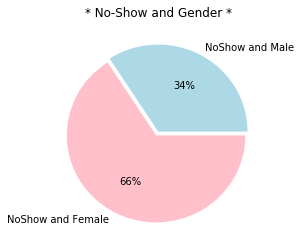

In [132]:
# showing the number of people who did not show and their Gender (Female, Male),
# and display the chart with a ratio.
genddM = ['M']
NSaM = len(df.loc[(df['No-show'] == 1) & df['Gender'].isin(genddM)])
genddF = ['F']
NSaF = len(df.loc[(df['No-show'] == 1) & df['Gender'].isin(genddF)])

print("Number of Male No-show = ", + NSaM)
print("Number of Female No-show = ", + NSaF)

plt.title('* No-Show and Gender *')
plt.pie([NSaM, NSaF]
        , explode= (0, 0.05)
        , labels= ['NoShow and Male', 'NoShow and Female']
        , colors= ['lightblue', 'pink']
        , autopct='%1.f%%')
fig = plt.gcf()
fig.set_size_inches(4,4);

The ratio of female who did not show is 66%

and the ratio of male who did not show is 34%

### Question 2:  What is the average age ratio for patients attendance?

In [48]:
# replace the data (Yes, No)inside No-show column with int (1, 0)
# showing the first twenty rows
df['No-show'].replace(['Yes'],1, inplace = True)
df['No-show'].replace(['No'],0, inplace = True)
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppWeekDay,SchWeekDay
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,Friday,Friday
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,Friday,Friday
5,9.598513e+13,5626772.0,F,2016-04-27 08:36:51,2016-04-29,76.0,REPÚBLICA,0.0,1.0,0.0,0.0,0.0,0.0,0,Friday,Wednesday
6,7.336882e+14,5630279.0,F,2016-04-27 15:05:12,2016-04-29,23.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,1,Friday,Wednesday
7,3.449833e+12,5630575.0,F,2016-04-27 15:39:58,2016-04-29,39.0,GOIABEIRAS,0.0,0.0,0.0,0.0,0.0,0.0,1,Friday,Wednesday
8,5.639473e+13,5638447.0,F,2016-04-29 08:02:16,2016-04-29,21.0,ANDORINHAS,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday
9,7.812456e+13,5629123.0,F,2016-04-27 12:48:25,2016-04-29,19.0,CONQUISTA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Wednesday


In [101]:
# average of Age for people who showed up
df.Age[df['No-show'] == 0].mean()

39.07516398080147

In [102]:
# average of Age for people who did not show
df.Age[df['No-show'] == 1].mean()

35.329151291512915

In [133]:
# declare some variables
show = df['No-show'] == 0
notshow = df['No-show'] == 1
df['show'] = show
df['notshow'] = notshow
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppWeekDay,SchWeekDay,show,notshow
0,2.987250e+13,5642903.0,F,2016-04-29 18:38:08,2016-04-29,62.0,JARDIM DA PENHA,0.0,1.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
1,5.589978e+14,5642503.0,M,2016-04-29 16:08:27,2016-04-29,56.0,JARDIM DA PENHA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
2,4.262962e+12,5642549.0,F,2016-04-29 16:19:04,2016-04-29,62.0,MATA DA PRAIA,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
3,8.679512e+11,5642828.0,F,2016-04-29 17:29:31,2016-04-29,8.0,PONTAL DE CAMBURI,0.0,0.0,0.0,0.0,0.0,0.0,0,Friday,Friday,True,False
4,8.841186e+12,5642494.0,F,2016-04-29 16:07:23,2016-04-29,56.0,JARDIM DA PENHA,0.0,1.0,1.0,0.0,0.0,0.0,0,Friday,Friday,True,False


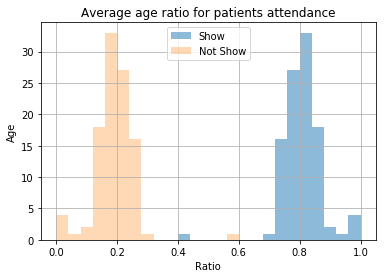

In [138]:
# calculate the average of age for the people who showed and no-showed, 
# and display the average age ratio for patients attendanc
plt.title("Average age ratio for patients attendance")
df.groupby('Age')['show'].mean().hist(alpha=0.5, bins=15, label='Show');
df.groupby('Age')['notshow'].mean().hist(alpha=0.3, bins=15, label='Not Show');
plt.legend()
plt.xlabel("Ratio")
plt.ylabel("Age")
fig.set_size_inches(4,4);

The average of age for 20% who did not show is 35

and the average of age for 20% who did not show is 39

<a id='conclusions'></a>
## Conclusions
The analysis for No-show appointments dataset was a good experience, and it contained some of the noisy data that has been solved. and here are some limitations and findings which faced during the analysis 
### Limitations
There are some external factors that may faced the patients and prevent them to come to hospital.

And there are some situation that must be consider and the dataset can not contain it such as is the patient able to pay the appointment fee, or does he still need to the appointment and so on.
    
### Findings and results

In this dataset there was a several noisy data that may give wrong information which will leat to wrong analysis and then the desicions will be based on wrong information, like the outlyers, missing values, duplicated data and so on. After wrangling the dataset the two questions has been solved by showing diagrams and extract the answers.
<ul>
<li>What is the percentage of attendance for patients? And the rate for both male and female in (Show) and (No Show)?</li>

The answer is 80% of the patients was showing in thier appointments, the rest of patients they did not show.

The ratio of female who showed is 65%, and the ratio of male who showed is 35%.

The ratio of female who did not show is 66%, and the ratio of male who did not show is 34%.
</ul>

<ul><li>What is the average age ratio for patients attendance?</li>

After analyzing the diagrams I found that the average of age for 20% who did not show is 35, and the average of age for 20% who did not show is 39.
</ul>


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])